In [1]:
# reading all the files csv files in the same directory at once 
import os
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
# Use the darkgrid theme for seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


data_directory = "/kaggle/input/temperature-timeseries-for-some-brazilian-cities"
input_data = {}
for filename in os.listdir(data_directory): 
    if filename.endswith(".csv"): 
        variable_name = filename.split('.')[0]
        input_data[variable_name] = pd.read_csv(os.path.join(data_directory, filename))

input_data.keys()

dict_keys(['station_goiania', 'station_manaus', 'station_sao_luiz', 'station_belem', 'station_curitiba', 'station_salvador', 'station_sao_paulo', 'station_macapa', 'station_rio', 'station_vitoria', 'station_recife', 'station_fortaleza'])

In [2]:
# Replacing the nan values 
input_data['station_belem'].replace(999.90, np.NaN).fillna(method='ffill')[:10]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1961,26.43,25.53,25.88,26.07,26.31,26.64,26.77,26.72,26.62,26.46,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1,1962,26.30,26.06,26.15,26.04,26.83,26.74,26.71,26.94,26.87,26.80,26.68,26.91,26.29,26.34,26.80,26.78,26.55
2,1963,26.25,26.03,26.02,26.42,27.17,26.94,26.93,26.98,26.96,26.85,27.06,26.24,26.40,26.54,26.95,26.96,26.71
3,1964,25.70,25.52,25.41,25.75,26.55,26.91,27.16,27.34,27.32,26.85,27.06,26.24,25.82,25.90,27.14,26.96,26.39
4,1965,25.70,25.52,25.41,25.75,26.55,26.91,27.16,27.34,27.32,26.85,27.06,26.24,25.82,25.90,27.14,26.96,26.39
5,1966,25.70,25.52,25.41,25.75,26.55,26.91,27.16,27.34,27.32,26.85,27.06,26.24,25.82,25.90,27.14,26.96,26.39
6,1967,26.55,25.99,25.93,26.24,26.33,26.43,26.19,26.00,27.32,26.01,26.42,26.08,26.48,26.17,26.21,26.17,26.26
7,1968,25.99,25.99,25.74,26.24,26.33,26.38,26.67,26.76,26.86,26.94,26.87,26.73,25.90,26.17,26.60,26.89,26.41
8,1969,26.64,27.11,27.34,27.58,27.90,27.72,27.01,27.27,26.97,27.06,27.21,27.56,26.83,27.61,27.33,27.08,27.21
9,1970,26.70,26.99,26.63,27.11,27.16,26.76,26.77,26.82,26.34,26.76,26.90,26.90,27.08,26.97,26.78,26.67,26.88


In [3]:
# for all the NaN values 
for i in input_data.keys():
    for j in input_data[i].columns:
        input_data[i][j] = input_data[i][j].replace(999.90, np.NaN)
        input_data[i][j] = input_data[i][j].fillna(input_data[i][j].rolling(12,1).mean())

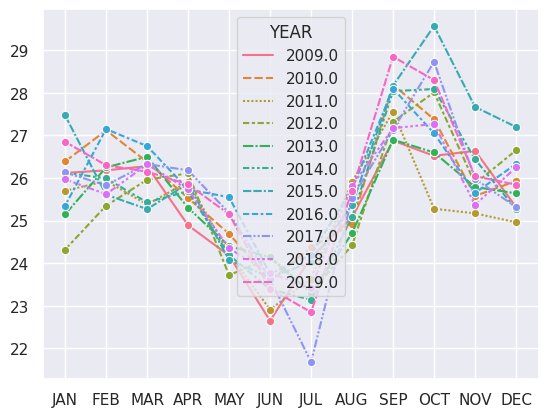

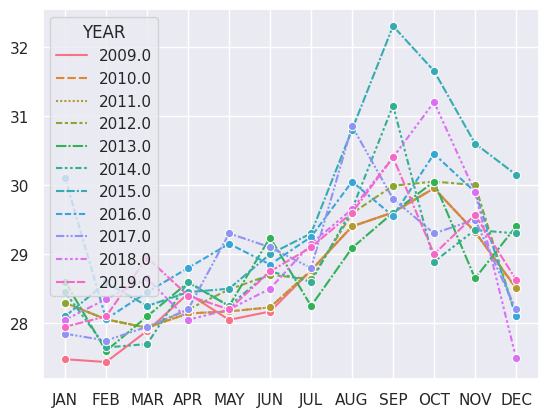

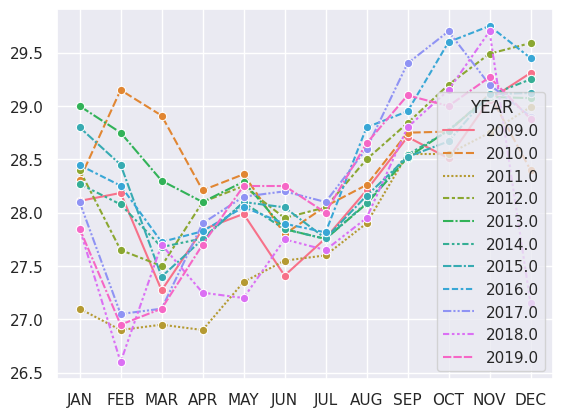

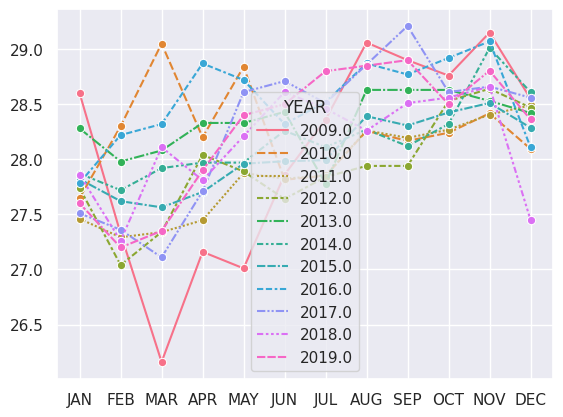

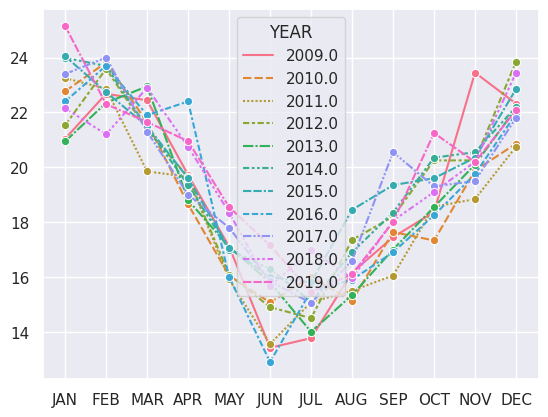

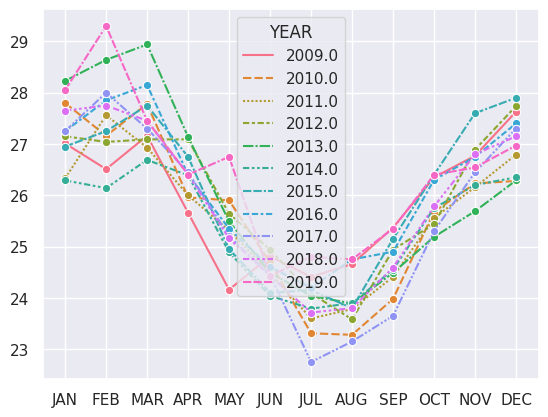

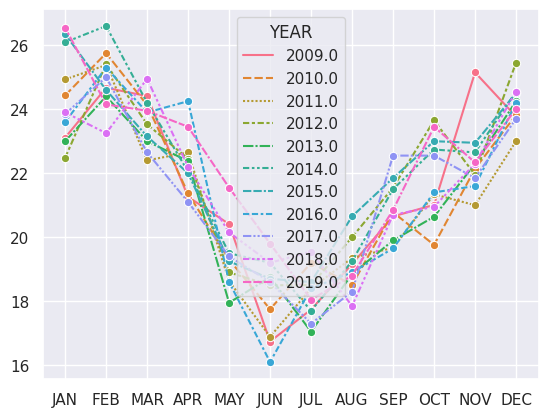

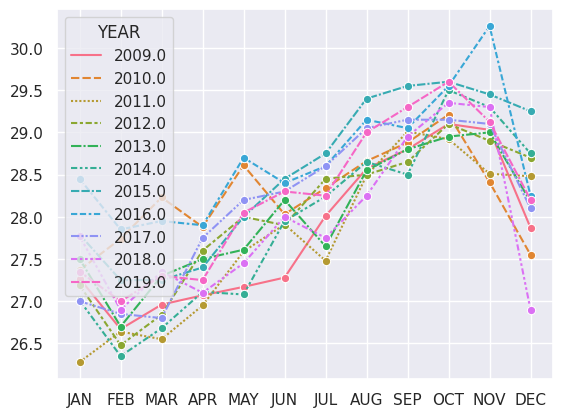

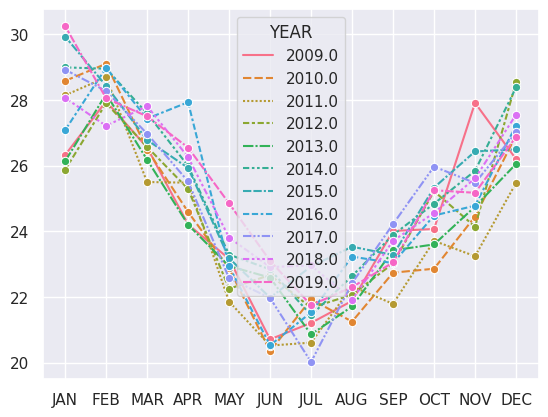

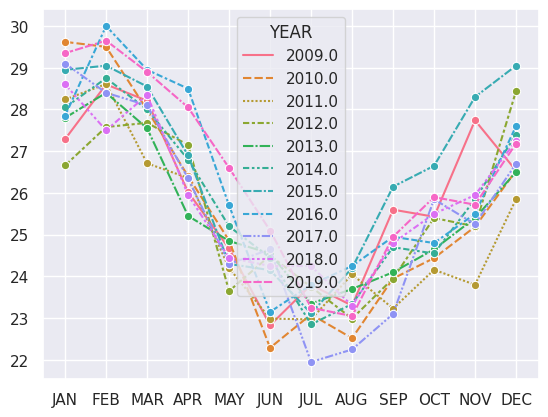

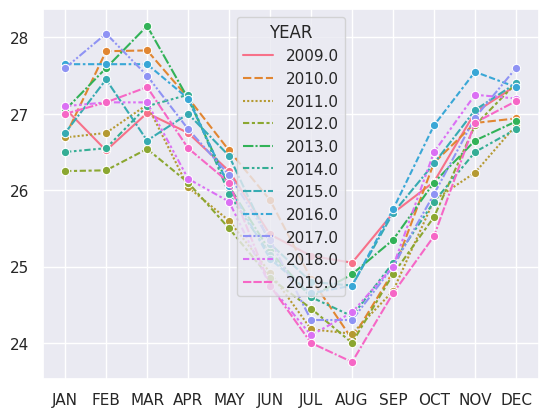

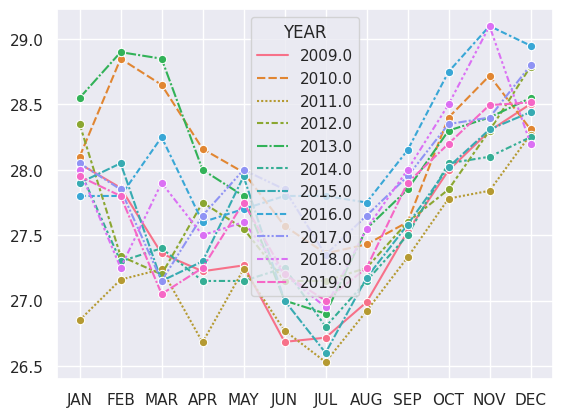

In [4]:

for i in input_data.keys():
    input_data[i].drop(['D-J-F','M-A-M', 'J-J-A','S-O-N'], axis=1, inplace=True)
    df_plot = input_data[i].T
    df_plot.columns = df_plot.iloc[0]
    df_plot.drop(['YEAR'], axis=0, inplace=True)
    plt.figure(i)
    sns.lineplot(data=df_plot.iloc[:-1,-11:], marker='o')   
    #g = sns.FacetGrid(df_plot.iloc[:-1,-11:], col="time",  row="")
    #g.map(sns.lineplot, "total_bill", "tip")

    

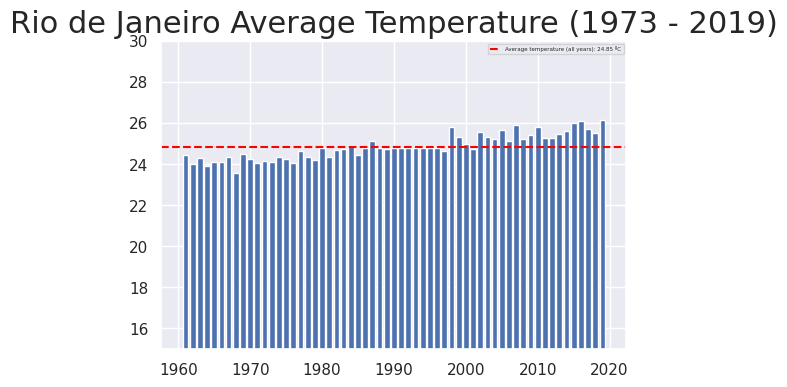

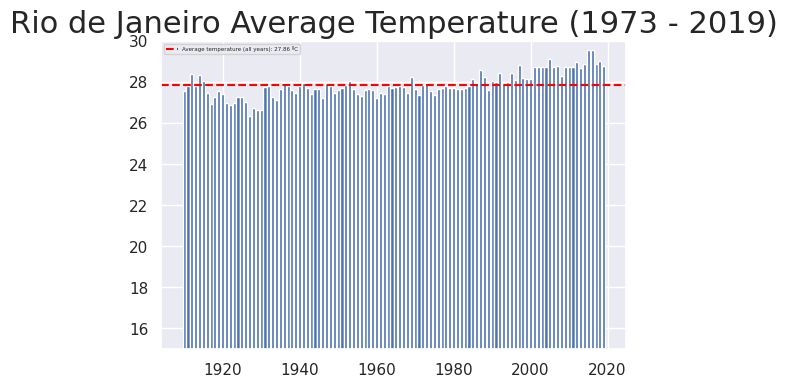

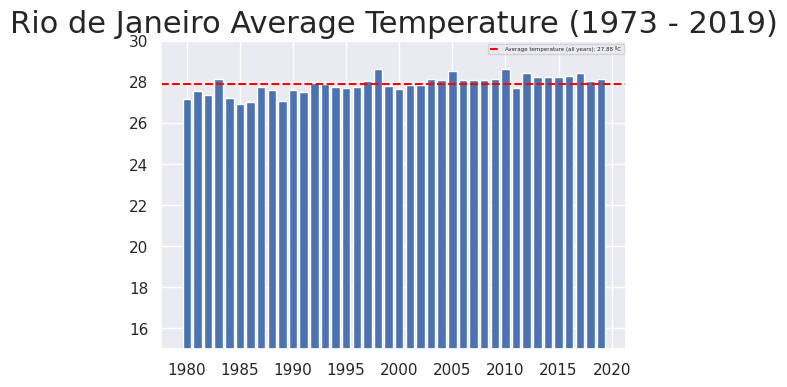

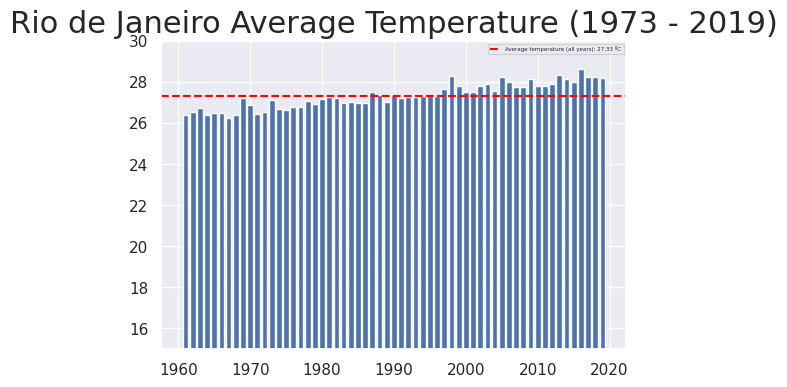

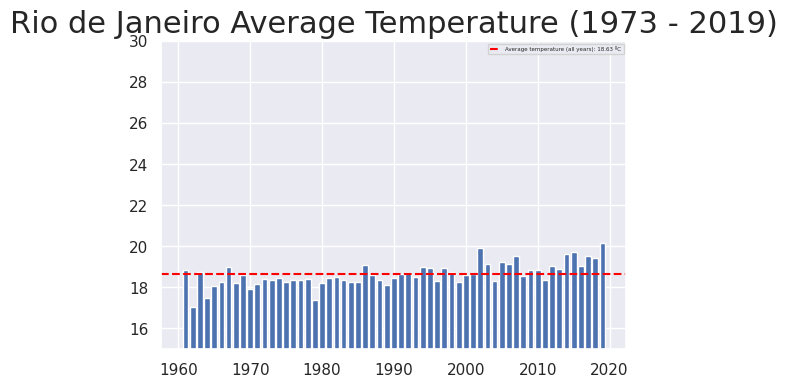

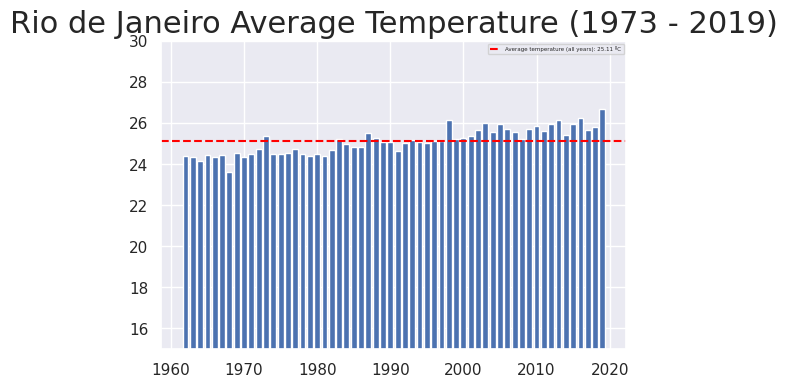

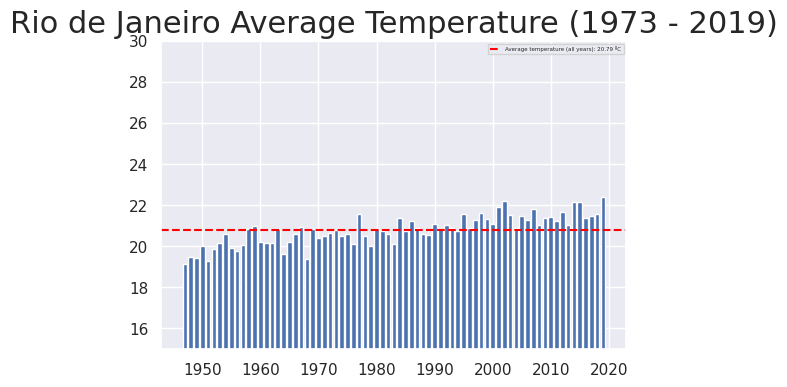

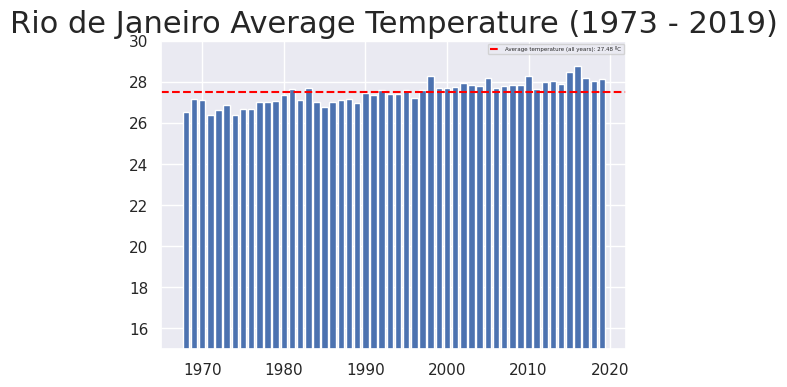

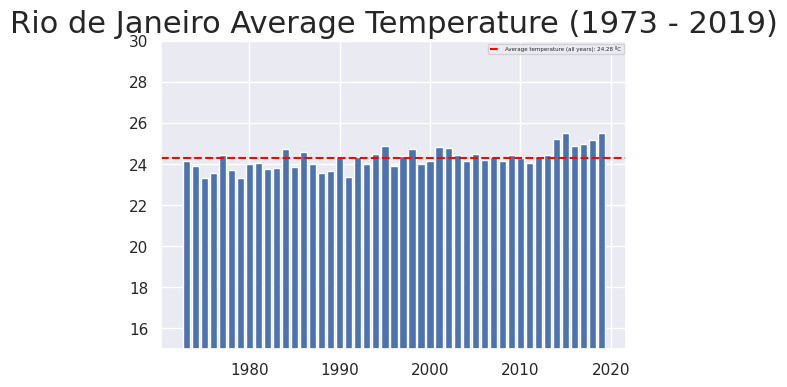

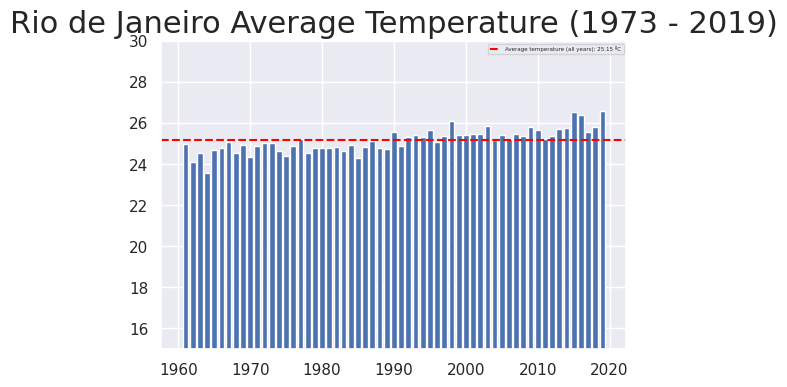

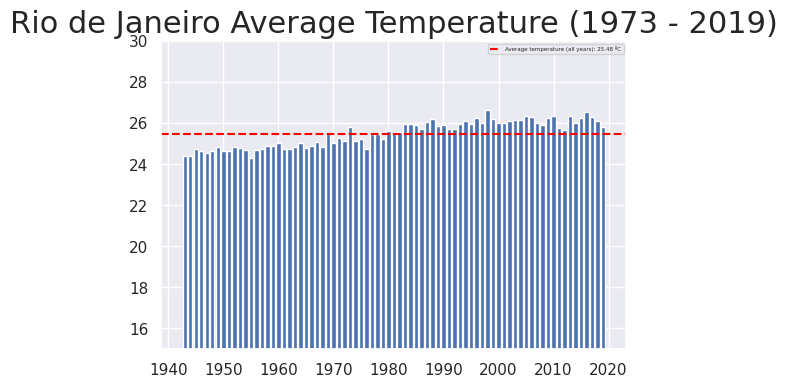

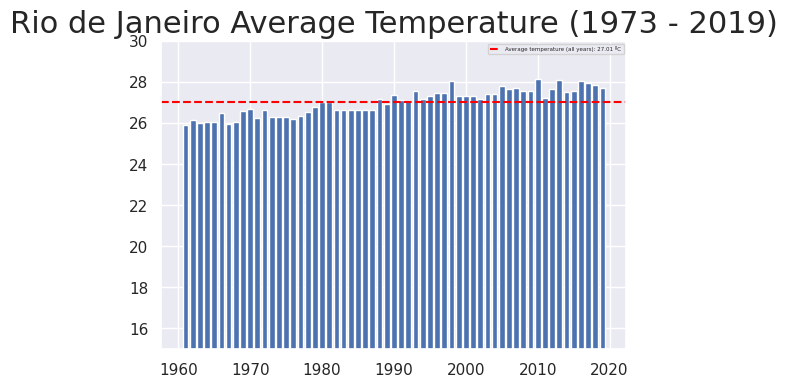

In [5]:
# ploting Year x Average Temperature 
for i in input_data.keys():
    fig = plt.figure(figsize = (6,4))
    df = input_data[i]
    avg_temp = round(df.metANN.mean(), 2)
    
    plt.bar(df['YEAR'], df['metANN'])
    plt.axhline(df['metANN'].mean(), linestyle = 'dashed', color = 'red', label = f'Average temperature (all years): {avg_temp} ºC')
    plt.ylim(15,30)
    plt.legend(fontsize = 4)
    plt.title('Rio de Janeiro Average Temperature (1973 - 2019)', fontsize = 22);
    

In [7]:
months_dict = {'JAN': 1, 'FEB' : 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN':6, 'JUL': 7, 'AUG':8, 'SEP':9, 'OCT': 10, 'NOV':11, 'DEC':12}


for i in input_data.keys():
        data_y_m = input_data[i][['YEAR'] + list(months_dict.keys())]
        data_y_m = pd.melt(data_y_m, id_vars=['YEAR'], value_vars=list(months_dict.keys()), var_name='MONTH', value_name='TEMP').replace({"MONTH": months_dict})
        data_y_m['DAY'] = 1

data_y_m.head()

,YEAR,MONTH,TEMP,DAY
0,1961,1,26.880,1
1,1962,1,26.730,1
2,1963,1,26.805,1
3,1964,1,26.680,1
4,1965,1,26.170,1


In [11]:
data_y_m['DATE'] = pd.to_datetime(data_y_m[['YEAR', 'MONTH', 'DAY']]) 

data_date = data_y_m[['DATE', 'TEMP']] 

data_date = data_date.sort_values('DATE').reset_index(drop=True)

data_date.head()


,DATE,TEMP
0,1961-01-01,26.88
1,1961-02-01,25.44
2,1961-03-01,26.00
3,1961-04-01,25.85
4,1961-05-01,26.08


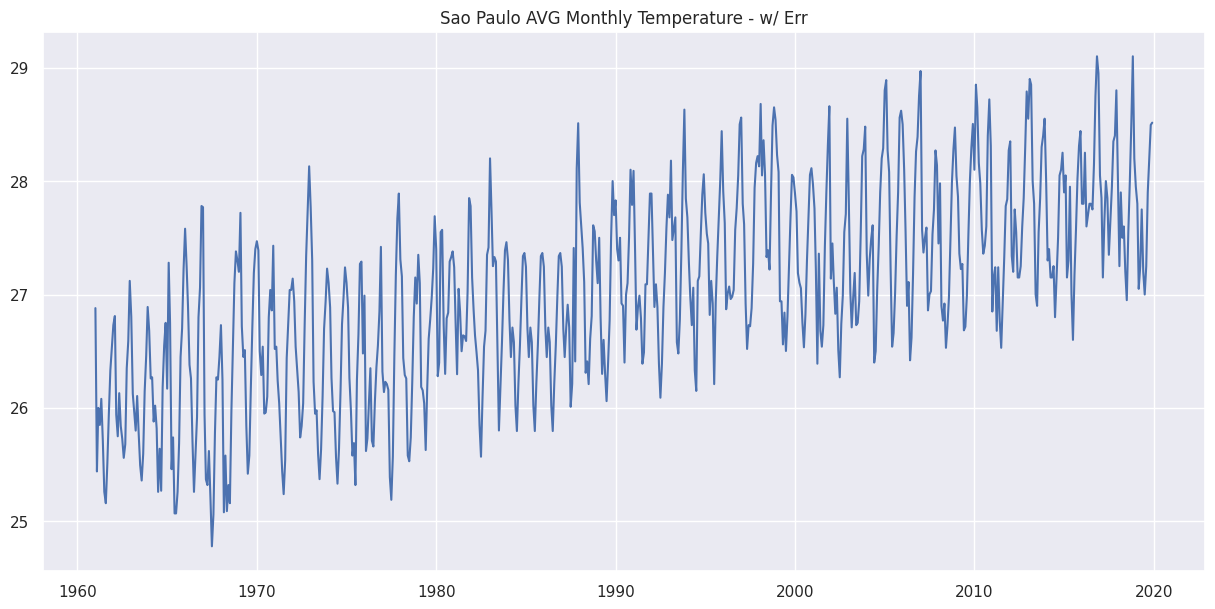

In [12]:
plt.figure(figsize=(15, 7))
plt.title("Sao Paulo AVG Monthly Temperature - w/ Err")
plt.plot(data_date['DATE'], data_date['TEMP'])
plt.show(block=False) 


# Performe a Linear Trend Forcast  
# seasonal plot 
# periodogram plot - this plot should agree with the seasonal plot 
# add the deterministic process - use calender fourier 
# perform linear regression for each plot above 
# ad LSTM + GRU

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ffff00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#ffff00'>| 1. </span> Predicating the Tempreture changes with variant models </b>

[Table of contents](#table)



In [ ]:
# the trend on the tempreture data 
# this is the moving average plot 
from pathlib import Path 
from warnings import simplefilter 

simplefilter("ignore")
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5)) 

plt.rc(
    "axes", 
    labelweight = "bold", 
    labelsize="large", 
    titleweight="bold", 
    titlesize=14, 
    titlepad = 10,
)

plot_params = dict(
    color = "0.75", 
    style = ".-",
    markeredgecolor="0.25", 
    markerfacecolor="0.25", 
    legend=False,
)


In [ ]:
# in the original example we have one single csv file 
# here there more than one csv file 

moving_average = df.rolling(
    window=365, 
    center=True, 
    min_periods=183,
).mean()
        
ax = df.plot(style=".", color="0.5")  
moving_average.plot(
    ax=ax, linewidth=3, title="tempreture changes", legend=False,
);


In [ ]:
df.columns

In [ ]:
# time series analysis with ARIMA 
https://github.com/PacktPublishing/A-Practical-Approach-to-Timeseries-Forecasting-using-Python/blob/main/5%20-%20Machine%20Learning%20in%20Time%20Series%20Forecasting/Notebook/NoteBook.ipynb 
    

<div style="color:white;display:fill;border-radius:8px;
            background-color:#ffff00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>
<a id='Introduction'></a>

#  <b><span style='color:#ffff00'>| 1. </span> Resources I used for this notebook </b>

[Table of contents](#table)
- [notebook done by GPANDAM](https://www.kaggle.com/code/garipurv/temperature-time-seriesforbrazilian-cities)
- [dylon plotting guide](https://www.datylon.com/resources/chart-library/scatter-plot?_gl=1*6bpyhz*_up*MQ..*_ga*MTUyNDcyMTU1My4xNjk2NjA2NjI4*_ga_4RCNNGGZW2*MTY5NjYwNjYyOC4xLjAuMTY5NjYwNjYyOC4wLjAuMA..)
- [python plot gralley](https://python-graph-gallery.com/508-connected-scatter-plot-seaborn/)
